In [ ]:
#https://github.com/rlcode/reinforcement-learning-kr/blob/master/2-cartpole/2-actor-critic/cartpole_a2c.py


        '''
        updates = opt.get_updates(params, constraints, loss)
        fun = K.function([input],[], updates=updates)
        '''
    


In [23]:
random.randint(1,3)

2

In [3]:
import sys
import gym
import pylab
import numpy as np
from keras.layers import Dense
from keras.models import Sequential ,Input, Model
from keras.optimizers import Adam
from keras import backend as K
import random

C:\Users\sh2\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [1]:
#target만들어서 해줘보자
class ActorCriticModel:
    def __init__(self,state_size,action_size):
        self.state_size = state_size
        self.action_size = action_size
        
        self.discount_factor = 0.99
        self.actor_lr = 0.001
        self.critic_lr = 0.005
        self.epsilon = 1
        self.decaying_epsilon = 0.999
        # target 할때 쓸거 self.tau = 0.001
        
        
        self.actor = self.build_actor()
        self.target_actor = self.build_actor()
        self.actor_updater = self.actor_optimizer()
        self.target_actor_updater = self.actor_optimizer()
        
        self.critic = self.build_critic()
        self.target_critic = self.build_critic()
        self.critic_updater = self.critic_optimizer()
        self.target_critic_updater = self.critic_optimizer()
        
        
        
    def build_actor(self):
        input_layer = Input(shape =(self.state_size,))
        h1 = Dense(24, activation ='relu',kernel_initializer='he_uniform')(input_layer)
        h2 = Dense(24, activation ='relu',kernel_initializer='he_uniform')(h1)
        h3 = Dense(self.action_size, activation = 'relu',kernel_initializer='he_uniform')(h2)
        output = Dense(self.action_size, activation='softmax',kernel_initializer='he_uniform')(h3)
        model = Model(inputs =input_layer, outputs = output)
        return model
        
    def build_critic(self):
        input_layer = Input(shape =(self.state_size,))
        h1 = Dense(24,activation='relu')(input_layer)
        h2 = Dense(24,activation='relu')(h1)
        h3 = Dense(24,activation='linear')(h2)
        output = Dense(self.action_size,activation='relu')(h3)
        model = Model(inputs = input_layer, outputs = output)
        return model
        
    def get_action(self,state):
        if(random.random()< self.epsilon):
            if(self.epsilon > 0.01):
                self.epsilon = self.epsilon * self.decaying_epsilon
            return randint(0,self.action_size-1)
        policy = self.actor.predict(state, batch_size= 1).flatten()
        return np.random.choice(self.action_size,1,p=policy)[0]
        
    def actor_optimizer(self):
        action = K.placeholder(shape =[None, self.action_size])
        advantage = K.placeholder(shape=[None,])
        
        action_prob = K.sum(action * self.actor.output,axis = 1)
        cross_entropy = K.log(action_prob) * advantage
        loss = -K.sum(cross_entropy)
        
        optimizer = Adam(lr=self.actor_lr)
        updates = optimizer.get_updates(self.actor.trainable_weights,[],loss)
        train = K.function([self.actor.input,action,advantage],[],updates=updates)
        return train
            
    def critic_optimizer(self):
        target = K.placeholder(shape=[None,])
        loss = K.mean(K.square(target - self.critic.output))
        
        optimizer = Adam(lr=self.critic_lr)
        updates = optimizer.get_updates(self.critic.trainable_weights,[],loss)
        train = K.function([self.critic.input,target],[],updates = updates)
        return train
    
    def train_model(self,state,action,reward,next_state,done):
        value = self.critic.predict(state)[0]
        next_value = self.critic.predict(next_state)[0]
        
        act = np.zeros([1,self.action_size])
        act[0][action] = 1

        if done:
            advantage = reward - value
            target = [reward]
            
        else :
            advantage = (reward + self.discount_factor * next_value) - value
            target = reward + self.discount_factor * next_value
        self.actor_updater([state,act,advantage])
        self.critic_updater([state,target])

In [2]:

    # CartPole-v1 환경, 최대 타임스텝 수가 500
EPISODES = 100
env = gym.make('CartPole-v1')
    # 환경으로부터 상태와 행동의 크기를 받아옴
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

    # 액터-크리틱(A2C) 에이전트 생성
agent = ActorCriticModel(state_size, action_size)

scores, episodes = [], []



NameError: name 'gym' is not defined

In [30]:
for e in range(1000):
    done = False
    score = 0
    rendering = False
    state = env.reset()
    state = np.reshape(state, [1, state_size])

    while not done:
        if rendering:
            env.render()

        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
            # 에피소드가 중간에 끝나면 -100 보상
        reward = reward if not done or score == 499 else -100
        agent.train_model(state, action, reward, next_state, done)

        score += reward
        state = next_state
        if done:
                # 에피소드마다 학습 결과 출력
            score = score if score == 500.0 else score + 100
            scores.append(score)
            episodes.append(e)
            print("episode:", e, "  score:", score)

                # 이전 10개 에피소드의 점수 평균이 490보다 크면 학습 중단
            if np.mean(scores[-min(10, len(scores)):]) > 490:
                    #agent.actor.save_weights("./save_model/cartpole_actor.h5")
                    #agent.critic.save_weights(
                    #    "./save_model/cartpole_critic.h5")
                sys.exit()

episode: 0   score: 12.0
episode: 1   score: 8.0
episode: 2   score: 19.0
episode: 3   score: 25.0
episode: 4   score: 22.0
episode: 5   score: 11.0
episode: 6   score: 24.0
episode: 7   score: 21.0
episode: 8   score: 11.0
episode: 9   score: 44.0
episode: 10   score: 28.0
episode: 11   score: 29.0
episode: 12   score: 14.0
episode: 13   score: 44.0
episode: 14   score: 21.0
episode: 15   score: 18.0
episode: 16   score: 35.0
episode: 17   score: 8.0
episode: 18   score: 34.0
episode: 19   score: 31.0
episode: 20   score: 16.0
episode: 21   score: 76.0
episode: 22   score: 49.0
episode: 23   score: 16.0
episode: 24   score: 19.0
episode: 25   score: 11.0
episode: 26   score: 23.0
episode: 27   score: 19.0
episode: 28   score: 17.0
episode: 29   score: 18.0
episode: 30   score: 14.0
episode: 31   score: 14.0
episode: 32   score: 28.0
episode: 33   score: 19.0
episode: 34   score: 18.0
episode: 35   score: 24.0
episode: 36   score: 25.0
episode: 37   score: 35.0
episode: 38   score: 10.

episode: 308   score: 28.0
episode: 309   score: 73.0
episode: 310   score: 34.0
episode: 311   score: 51.0
episode: 312   score: 14.0
episode: 313   score: 11.0
episode: 314   score: 23.0
episode: 315   score: 21.0
episode: 316   score: 28.0
episode: 317   score: 13.0
episode: 318   score: 18.0
episode: 319   score: 19.0
episode: 320   score: 16.0
episode: 321   score: 54.0
episode: 322   score: 38.0
episode: 323   score: 38.0
episode: 324   score: 18.0
episode: 325   score: 21.0
episode: 326   score: 12.0
episode: 327   score: 36.0
episode: 328   score: 51.0
episode: 329   score: 12.0
episode: 330   score: 37.0
episode: 331   score: 25.0
episode: 332   score: 30.0
episode: 333   score: 20.0
episode: 334   score: 35.0
episode: 335   score: 26.0
episode: 336   score: 20.0
episode: 337   score: 13.0
episode: 338   score: 10.0
episode: 339   score: 14.0
episode: 340   score: 28.0
episode: 341   score: 11.0
episode: 342   score: 12.0
episode: 343   score: 24.0
episode: 344   score: 12.0
e

episode: 614   score: 36.0
episode: 615   score: 22.0
episode: 616   score: 19.0
episode: 617   score: 18.0
episode: 618   score: 31.0
episode: 619   score: 15.0
episode: 620   score: 15.0
episode: 621   score: 27.0
episode: 622   score: 24.0
episode: 623   score: 54.0
episode: 624   score: 16.0
episode: 625   score: 10.0
episode: 626   score: 12.0
episode: 627   score: 17.0
episode: 628   score: 8.0
episode: 629   score: 21.0
episode: 630   score: 13.0
episode: 631   score: 53.0
episode: 632   score: 16.0
episode: 633   score: 22.0
episode: 634   score: 14.0
episode: 635   score: 30.0
episode: 636   score: 17.0
episode: 637   score: 17.0
episode: 638   score: 14.0
episode: 639   score: 11.0
episode: 640   score: 17.0
episode: 641   score: 13.0
episode: 642   score: 19.0
episode: 643   score: 26.0
episode: 644   score: 25.0
episode: 645   score: 14.0
episode: 646   score: 35.0
episode: 647   score: 38.0
episode: 648   score: 15.0
episode: 649   score: 18.0
episode: 650   score: 15.0
ep

episode: 919   score: 15.0
episode: 920   score: 26.0
episode: 921   score: 9.0
episode: 922   score: 12.0
episode: 923   score: 11.0
episode: 924   score: 53.0
episode: 925   score: 51.0
episode: 926   score: 10.0
episode: 927   score: 11.0
episode: 928   score: 17.0
episode: 929   score: 24.0
episode: 930   score: 52.0
episode: 931   score: 44.0
episode: 932   score: 22.0
episode: 933   score: 24.0
episode: 934   score: 12.0
episode: 935   score: 14.0
episode: 936   score: 18.0
episode: 937   score: 29.0
episode: 938   score: 15.0
episode: 939   score: 13.0
episode: 940   score: 23.0
episode: 941   score: 18.0
episode: 942   score: 15.0
episode: 943   score: 21.0
episode: 944   score: 23.0
episode: 945   score: 12.0
episode: 946   score: 21.0
episode: 947   score: 28.0
episode: 948   score: 21.0
episode: 949   score: 43.0
episode: 950   score: 11.0
episode: 951   score: 29.0
episode: 952   score: 18.0
episode: 953   score: 19.0
episode: 954   score: 15.0
episode: 955   score: 11.0
ep

In [31]:
import matplotlib.pyplot as plt

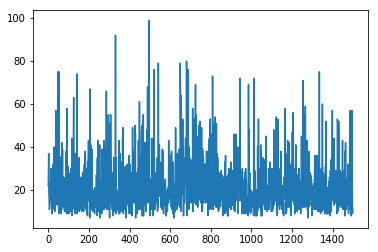

In [32]:
plt.plot(scores)
plt.show()